In [ ]:
import QuHE as qhe
from qiskit import *

In [ ]:
keys=[[1,1,0],[1,0,1]]
#keys=[[0,0,0,0,0],[1,0,0,0,0]]
qc=QuantumCircuit(3,3)
qc.h(range(3))


ctx=qhe.Context(qc,keys,method='qotp',scheme='Liang')
#ctx.encrypt()

In [ ]:
import QuHE as qhe
from qiskit import *

keys=[[1,1],[1,0]]
gv=QuantumCircuit(2,2)
gv.h(range(2))
ctx=qhe.Context(gv,keys,method='qotp',scheme='Liang')
ctx.encrypt()

#Oracle for 10
gv.x(1)
gv.cz(0,1)
gv.x(1)
gv.barrier()
gv.h(range(2))

#Amplification
gv.z(range(2))
gv.cz(0,1)
gv.h(range(2))

# Key update
ctx.update_h(0)
ctx.update_h(1)
ctx.update_cz(0,1)
ctx.update_h(0)
ctx.update_h(1)
#Decryption
x=ctx.decrypt()
ctx.visualize()





In [ ]:
qc.draw(output='mpl')

In [ ]:

ctx.add_Z(range(3))
ctx.add_CZ(0,1)
ctx.add_CZ(0,2)
ctx.add_CZ(1,2)
ctx.add_H(range(3))
ctx.add_X(range(3))
qc.h(2)
qc.ccx(0,1,2)
qc.h(2)
ctx.add_X(2)
qc.h(2)
ctx.add_X(1)
qc.h(1)
ctx.add_X(0)
qc.h(0)






In [ ]:
qc.draw(output='mpl')

In [ ]:
x=ctx.decrypt()
print(x)
ctx.visualize()

In [ ]:
ctx.add_Z(range(3))
ctx.add_CZ(0,1)
ctx.add_CZ(0,2)
ctx.add_CZ(1,2)
qc.h(range(3))
ctx.add_X(range(3))
qc.h(2)
qc.ccx(0,1,2)
#ctx.add_X(2)
#just replace ccx with
qc.h(2)
ctx.add_X(2)
qc.h(2)
ctx.add_X(1)
qc.h(1)
ctx.add_X(0)
qc.h(0)

In [ ]:
gv=QuantumCircuit(2,2)
gv.h(range(2))

#Oracle for 10
gv.x(1)
gv.cz(0,1)
gv.x(1)
gv.barrier()

gv.h(range(2))

#Amplification
gv.z(range(2))
gv.cz(0,1)
#gv.t(0)

gv.h(range(2))


In [ ]:
qc_and = QuantumCircuit(3)
qc_and.ccx(0,1,2)
print('AND gate')
display(qc_and.draw())
print('\n\nTranspiled AND gate with all the reqiured connectiviy')
qc_and.decompose().draw(output='mpl')

In [ ]:
qc_and = QuantumCircuit(4)
qc_and.cz(0,1)
print('AND gate')
display(qc_and.draw())
print('\n\nTranspiled AND gate with all the reqiured connectiviy')
qc_and.decompose().draw()

In [ ]:
# CCCZ-gate 

from qiskit.circuit.library import MCMTVChain
c3z = MCMTVChain('z', num_ctrl_qubits=3, num_target_qubits=1)
c3z.draw(output='mpl')


In [ ]:
c3z.decompose().draw(output='mpl')

## Method 2 for CCCZ

In [ ]:
from qiskit import QuantumCircuit

noancilla = QuantumCircuit(4)
noancilla.h(3)  # H on target qubit
noancilla.mcx([0, 1, 2], 3, mode='noancilla')
noancilla.h(3)  # again H on target qubit
noancilla.draw()

In [ ]:
noancilla.decompose().draw()

In [ ]:
c3x=QuantumCircuit(4,4)
c3x.mcx([0, 1, 2], 3, mode='noancilla')
c3x.decompose().draw(output='mpl')

In [ ]:
from qiskit import QuantumCircuit, transpile
from qiskit.circuit.library.standard_gates import C3XGate
qc = QuantumCircuit(4)
qc.append(C3XGate(), [0, 1, 2, 3])
print(qc)
transpiled = transpile(qc, basis_gates=['u','cx'], optimization_level=3)

In [ ]:
#ccz

qc.h(2)
ctx.add_CX(1,2)
qc.tdg(2)
ctx.add_CX(0,2)
qc.t(2)
ctx.add_CX(1,2)
qc.t(1)
qc.tdg(2)
ctx.add_CX(0,2)
ctx.add_CX(0,1)
qc.t(2)
qc.t(0)
qc.tdg(1)
qc.h(2)
ctx.add_CX(0,1)

In [ ]:
!pip install pdflatex


In [ ]:
qc.draw(output='latex')

In [3]:
import QuHE as qhe
from qiskit import *
 
 
keys=[[1,1,1],[1,1,0]]
#keys=[[0,0,0],[0,0,0]]
qc=QuantumCircuit(3,3)
ctx=qhe.Context(qc,keys,method='qotp',scheme='Liang')

ctx.add_H(range(3))
ctx.encrypt()
 
 #Grover's algorithm 
ctx.add_Z(range(3))
ctx.add_CZ(0,1)
ctx.update_cz(0,1)
ctx.add_CZ(0,2)
ctx.update_cz(0,2)
ctx.add_CZ(1,2)
ctx.update_cz(1,2)
ctx.add_H(range(3))
ctx.update_h(0)
ctx.update_h(1)
ctx.update_h(2)
ctx.add_X(range(3))
ctx.add_H(2) 
ctx.update_h(2)       
# Toffoli
qc.barrier()
ctx.add_H(2)
ctx.update_h(2)
ctx.add_CX(1,2)
ctx.update_cx(1)

#qc.tdg(2)
ctx.add_Tdg(2)
ctx.update_Tdg(2)

ctx.add_CX(0,2)
ctx.update_cx(0)

#qc.t(2)
ctx.add_T(2)
ctx.update_T(2)

ctx.add_CX(1,2)
ctx.update_cx(1)

#qc.t(1)
ctx.add_T(1)
ctx.update_T(1)

#qc.tdg(2)
ctx.add_Tdg(2)
ctx.update_Tdg(2)
ctx.add_CX(0,2)
ctx.update_cx(0)
ctx.add_CX(0,1)
ctx.update_cx(0)

#qc.t(2)
ctx.add_T(2)
ctx.update_T(2)
ctx.add_H(2)
ctx.update_h(2)

#qc.t(0)
ctx.add_T(0)
ctx.update_T(0)

#qc.tdg(1)
ctx.add_Tdg(1)
ctx.update_Tdg(1)
#ctx.add_H(2)
#ctx.update_h(2)
ctx.add_CX(0,1)
ctx.update_cx(0)
qc.barrier()

 
ctx.add_H(2)
ctx.update_h(2)
ctx.add_X(2)
ctx.add_H(2)
ctx.update_h(2)
ctx.add_X(1)
ctx.add_H(1)
ctx.update_h(1)
ctx.add_X(0)
ctx.add_H(0)
ctx.update_h(0)
 

#x=ctx.decrypt()
#print(x)
"""
ctx.qc.barrier()
for i in range(len(keys[0])):
    ctx.measure(i)
backend = BasicAer.get_backend('qasm_simulator')
shots = 1096
results = execute(ctx.qc, backend=backend, shots=shots).result()
answer = results.get_counts()
x=list(answer.keys())
#print(x)
 
print('updated_keys',keys)
e=''
k=''
#for j in range(len(keys[0])):
#    e+=str((int(x[0][j])+keys[0][2-j])%2)
#    k+=str((int(x[1][j])+keys[0][2-j])%2)
"""
#print('decrypted_results',e,k)
#print(keys)
x=ctx.decrypt()
print("############# Decryption #############",x)

#ctx.visualize()
 




       ┌───┐┌───┐┌───┐ ░ ┌───┐      ┌───┐┌───┐           ░                     »
  q_0: ┤ H ├┤ X ├┤ Z ├─░─┤ Z ├─■──■─┤ H ├┤ X ├───────────░─────────────────────»
       ├───┤├───┤├───┤ ░ ├───┤ │  │ └───┘├───┤┌───┐      ░                     »
  q_1: ┤ H ├┤ X ├┤ Z ├─░─┤ Z ├─■──┼───■──┤ H ├┤ X ├──────░────────■────────────»
       ├───┤├───┤└───┘ ░ ├───┤    │   │  ├───┤├───┤┌───┐ ░ ┌───┐┌─┴─┐┌─────┐   »
  q_2: ┤ H ├┤ X ├──────░─┤ Z ├────■───■──┤ H ├┤ X ├┤ H ├─░─┤ H ├┤ X ├┤ TDG ├─X─»
       └───┘├───┤      ░ └───┘           └───┘└───┘└───┘ ░ └───┘└───┘└─────┘ │ »
aux_0: ─|0>─┤ H ├──■─────────────────────────────────────────────────────────X─»
            └───┘┌─┴─┐                                                         »
aux_1: ─|0>──────┤ X ├─────────────────────────────────────────────────────────»
                 └───┘                                                         »
  c_0: ════════════════════════════════════════════════════════════════════════»
                            

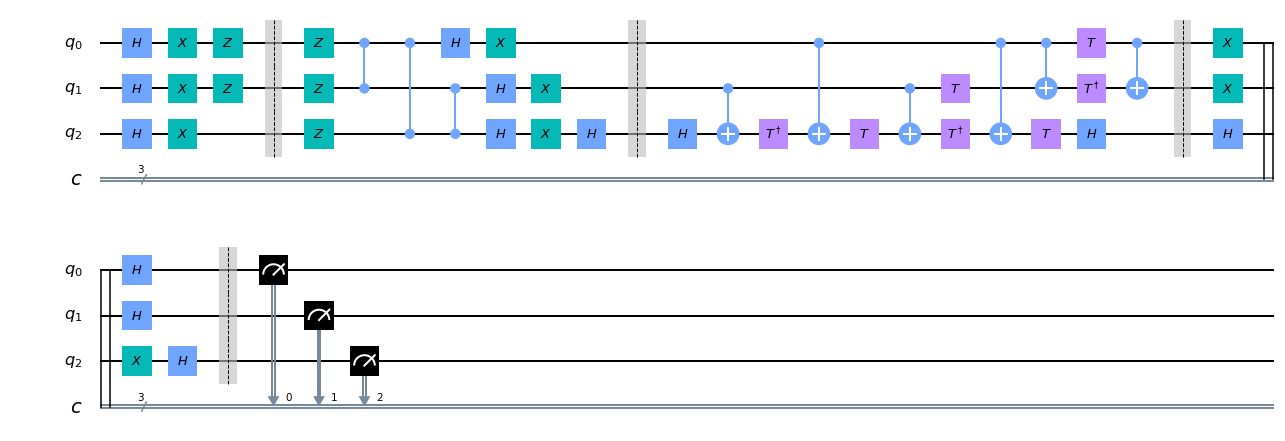

In [4]:
ctx.visualize()

In [ ]:
from qiskit.visualization import plot_histogram
backend = BasicAer.get_backend('qasm_simulator')
shots = 1069
results = execute(ctx.qc, backend=backend, shots=shots).result()
answer = results.get_counts()
r=list(answer)
plot_histogram(answer)


In [ ]:
import QuHE as qhe
from qiskit import *
 
 
#keys=[[1,0,1],[1,1,0]]
keys=[[0,0,0],[0,0,0]]
qc=QuantumCircuit(3,3)
ctx=qhe.Context(qc,keys,method='qotp',scheme='Liang')

ctx.encrypt()

ctx.add_T(0)
ctx.update_T(0)


ctx.add_T(1)
ctx.update_T(1)

ctx.add_X(1)# no key update is required with the X-gate

ctx.add_T(1)
ctx.update_T(1)

ctx.add_X(2)




x=ctx.decrypt()
print(x)
ctx.visualize()


In [ ]:
qc.draw(output='mpl')

T-gate update circuit:        ┌───┐       ░                               
  q_0: ┤ Z ├───────░───────────────────────────────
       ├───┤┌───┐  ░                               
  q_1: ┤ X ├┤ Z ├──░───────────────────────────────
       └───┘└───┘  ░  ┌───┐┌───┐                   
  q_2: ────────────░──┤ X ├┤ T ├─X─────────────────
            ┌───┐  ░  └───┘└───┘ │      ┌───┐┌─┐ ░ 
aux_0: ─|0>─┤ H ├──■─────────────X───■──┤ H ├┤M├─░─
            └───┘┌─┴─┐             ┌─┴─┐└┬─┬┘└╥┘ ░ 
aux_1: ─|0>──────┤ X ├─────────────┤ X ├─┤M├──╫──░─
                 └───┘             └───┘ └╥┘  ║  ░ 
  c_0: ═══════════════════════════════════╬═══╬════
                                          ║   ║    
  c_1: ═══════════════════════════════════╬═══╬════
                                          ║   ║    
  c_2: ═══════════════════════════════════╬═══╬════
                                          ║   ║    
 c1_0: ═══════════════════════════════════╬═══╩════
                                         

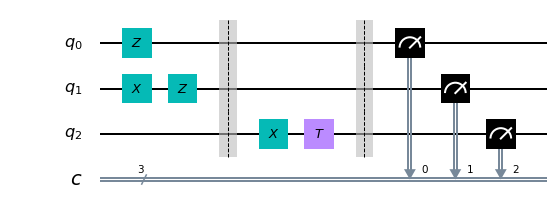

In [2]:
from qiskit import *
import QuHE as qhe
keys=[[0,1,0],[1,1,0]]
#keys=[[0,0,0],[0,0,0]]
qc=QuantumCircuit(3,3)
ctx=qhe.Context(qc,keys,method='qotp',scheme='Liang')

ctx.encrypt()


#ctx.update_T(1)




#ctx.update_T(0)



ctx.add_H(2)
ctx.update_h(2)






x=ctx.decrypt()
print(x)
ctx.visualize()

In [ ]:
from qiskit.visualization import plot_histogram
backend = BasicAer.get_backend('qasm_simulator')
shots = 1
results = execute(ctx.qc, backend=backend, shots=shots).result()
answer = results.get_counts()
r=list(answer)
plot_histogram(answer)
